# Project 2: Predicting House Prices with Linear Regression (Part 2 of 3)


> By:  Rohazeanti Mohamad Jenpire

## Table of Contents
- [Imports](#Imports)
- [Read Data](#Read-Data)
- [Data Cleaning](#Data-Cleaning)

## Imports

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

## Read Data

In [29]:
test = pd.read_csv('datasets/test.csv')

In [30]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [31]:
test.shape

(878, 80)

### Describe the data

In [32]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


## Data Info

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [34]:
#### Cleaning functions

In [35]:
#drop columns
def drop_columns(df, columns):
    df.drop(columns, axis = 1, inplace = True)

In [36]:
#function to store missing columns in list
def show_missing_columns(df):
    #create empty list
    missing_cols = []
    #iterate each column in dataframe
    for cols in df.columns:
        #if there is a missing value in iterated column
        if df[cols].isnull().sum() > 0:
            #append the column with missing value in the list
            missing_cols.append(cols)
    return missing_cols

In [37]:
#function to show missing columns
def missing_columns(df):
    mis_col = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent_missing = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)[round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False) !=0]
    data_types = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    result = pd.concat([mis_col,percent_missing,data_types], axis = 1, keys = ['Total Null Values','% Null Values','Data Types'])
    return result

### Overview of missing data

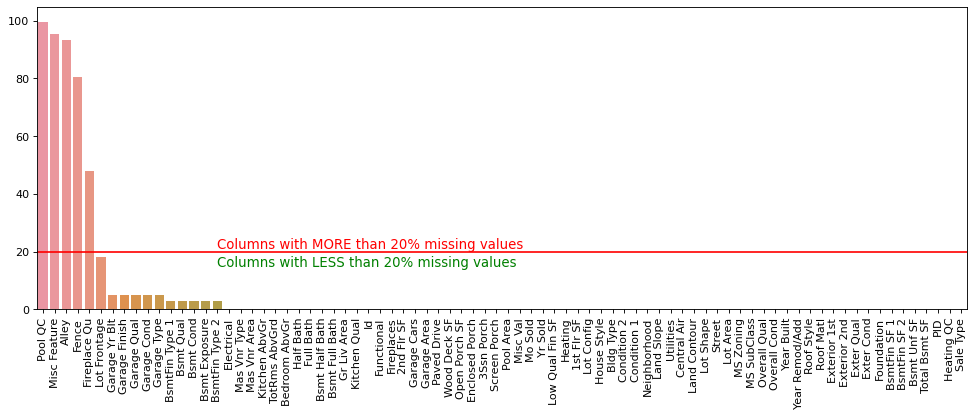

In [38]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
plt.figure(figsize=(15,5), dpi = 80)
plt.xticks(rotation = 90)
#Drawing a horizontal line at point 2.0
plt.axhline(20, color = 'red')
plt.text(15, 21,'Columns with MORE than 20% missing values', fontsize=12, color = 'red')
plt.text(15, 15,'Columns with LESS than 20% missing values', fontsize=12, color = 'green')
sns.barplot(data = missing_value_df, x = test.columns, y = percent_missing,
            order=missing_value_df.sort_values('percent_missing', ascending = False).column_name);

In [39]:
#show counts of missing values - test set
missing_columns(test)

,Total Null Values,% Null Values,Data Types
Pool QC,874,99.54,object
Misc Feature,837,95.33,object
Alley,820,93.39,object
Fence,706,80.41,object
Fireplace Qu,422,48.06,object
Lot Frontage,160,18.22,float64
Garage Cond,45,5.13,object
Garage Qual,45,5.13,object
Garage Yr Blt,45,5.13,float64
Garage Finish,45,5.13,object


#### Clean Lot related variables

In [40]:
test.groupby(['Neighborhood'])[['Lot Frontage', 'Lot Area']].mean()

,Lot Frontage,Lot Area
Neighborhood,,
Blmngtn,45.500000,3408.666667
Blueste,26.750000,2251.750000
BrDale,21.818182,1914.090909
BrkSide,54.200000,6822.937500
ClearCr,81.625000,18972.294118
CollgCr,72.696970,9529.000000
Crawfor,71.285714,11611.000000
Edwards,65.541667,9451.500000
Gilbert,79.363636,11814.183673


In [41]:
#imput missing value for Lot Frontage with median
test['Lot Frontage']  = test.groupby(['Neighborhood'])[['Lot Frontage']].transform(lambda x: x.fillna(x.mean()))

In [42]:
test['Lot Frontage'].isnull().sum()

0

In [43]:
missing_columns(test)

,Total Null Values,% Null Values,Data Types
Pool QC,874,99.54,object
Misc Feature,837,95.33,object
Alley,820,93.39,object
Fence,706,80.41,object
Fireplace Qu,422,48.06,object
Garage Cond,45,5.13,object
Garage Yr Blt,45,5.13,float64
Garage Finish,45,5.13,object
Garage Qual,45,5.13,object
Garage Type,44,5.01,object


#### Replace missind data with None or 0

In [44]:
col_to_replace = ['Pool QC','Misc Feature',
'Alley','Fence','Fireplace Qu','Garage Yr Blt','Garage Finish',
'Garage Cond','Garage Qual','Garage Type', 'BsmtFin Type 2','Bsmt Exposure',
'Bsmt Cond','Bsmt Qual','BsmtFin Type 1','Mas Vnr Type','Mas Vnr Area','Electrical']


In [45]:
#final function for replace missing columns
def replace_missing_columns(df, col_name):
    for col in col_name:
        if df[col].dtypes == 'object':
            df[col].fillna('None', inplace = True)
        elif df[col].dtypes == 'float64': 
            df[col].fillna(0, inplace = True)
    return missing_columns(df[col_name])

In [46]:
#check missing columns
replace_missing_columns(test, col_to_replace)

,Total Null Values,% Null Values,Data Types


#### Map ordinal categories

In [47]:
test = test.replace({"Alley" : {"None": 0, "Grvl" : 1, "Pave" : 2},
                       "Bsmt Cond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Bsmt Exposure" : {"None" : 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFin Type 1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFin Type 2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "Bsmt Qual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "Exter Cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Exter Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Fireplace Qu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "Garage Cond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Garage Qual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Garage Finish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin": 3},
                       "Heating QC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Kitchen Qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Land Slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "Lot Shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "Paved Drive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Pool QC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                      "Electrical" : {"Mix" : 1, "FuseP" : 2, "FuseF" : 3, "FuseA" : 4, "SBrkr" : 5}, 
                      "Fence" : {"None" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4}}
                     )

#### Create new features

In [48]:
#Create age of house since it was built till sold 
test['Age_Built'] = test['Yr Sold'] - test['Year Built']

#Create age remod/add of house till sold 
test['Age_Remod'] = test['Yr Sold'] - test['Year Remod/Add']
test.loc[test['Year Remod/Add'] == 0, 'Age_Remod'] = 0
test.loc[test['Yr Sold'] == test['Garage Yr Blt'], 'Age_Remod'] = 1

#Create age of garage since it was built till sold
test['Age_Garage'] = test['Yr Sold'] - test['Garage Yr Blt']
test.loc[test['Garage Yr Blt'] == 0, 'Age_Garage'] = 0
test.loc[test['Yr Sold'] == test['Garage Yr Blt'], 'Age_Garage'] = 1 #differentiate between houses with no garage and with garage built & sold same yr

#### Dropping undesireable columns

In [49]:
to_drop = ['Alley', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath',
 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Heating',
 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Central Air',
 'Electrical', 'Functional', 'Garage Cond', 'Paved Drive', 'Yr Sold',
 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Lot Shape',
 'PID', 'Overall Cond', 'MS SubClass', 'Land Slope', 'BsmtFin Type 2',
 'Mo Sold', 'Exter Cond', 'Bedroom AbvGr', 'Bsmt Unf SF', '2nd Flr SF',
 'Bsmt Cond', 'Bsmt Full Bath', 'Half Bath', 'Garage Qual', 'Wood Deck SF',
 'Open Porch SF', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Exposure',
 'Lot Frontage', 'BsmtFin Type 1']

In [50]:
drop_columns(test, to_drop)

In [51]:
#drop Vif
to_drop = ['1st Flr SF', 'Garage Cars', 'Exter Qual',
           'Bsmt Qual', 'Kitchen Qual', 'Total Bsmt SF',
           'Heating QC', 'Full Bath']
drop_columns(test, to_drop)

In [52]:
# Saving the cleaned dataset

test.to_csv("./datasets/test_clean.csv", index=False)

In [53]:
test.shape

(878, 26)

In [54]:
test.head()

,Id,MS Zoning,Land Contour,Lot Config,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Roof Style,...,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Area,Sale Type,Age_Built,Age_Remod,Age_Garage
0,2658,RM,Lvl,Inside,OldTown,Norm,2fmCon,2Story,6,Gable,...,9,0,0,Detchd,1,440,WD,96,56,96.0
1,2718,RL,Lvl,Inside,Sawyer,Norm,Duplex,1Story,5,Gable,...,10,0,0,Attchd,3,580,WD,29,29,29.0
2,2414,RL,Lvl,Inside,Gilbert,Norm,1Fam,2Story,7,Gable,...,7,1,4,Attchd,2,426,New,0,1,1.0
3,1989,RM,Lvl,Inside,OldTown,Norm,1Fam,1Story,5,Gable,...,5,0,0,Detchd,1,480,WD,84,1,72.0
4,625,RL,Lvl,Inside,NAmes,Norm,1Fam,1Story,6,Gable,...,6,2,4,Attchd,2,514,WD,46,46,46.0
